In [2]:
pip install keras

In [5]:
#first, we import the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# split the dataset into test and training dataset
(X_train,y_train), (X_test,y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
# Get the shape of the image
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
#we analyse the first image in the training set
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
#print the image label
y_train[0]

5

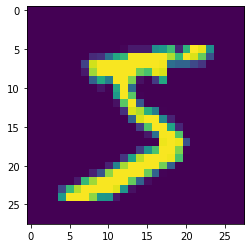

In [11]:
#showing the image using imshow()
plt.imshow(X_train[0])

In [12]:
#Reshape the data to fit the model
X_train =  X_train.reshape(60000, 28, 28, 1)
X_test =  X_test.reshape(10000, 28, 28, 1)

In [13]:
#one hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
#print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
# I have built a CNN model here using the scikit learn documentation
model = Sequential()
# we add the model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [15]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
#train the model
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 145s 77ms/step - loss: 0.6207 - accuracy: 0.9195 - val_loss: 0.0811 - val_accuracy: 0.9749
Epoch 2/3
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0657 - accuracy: 0.9799 - val_loss: 0.0769 - val_accuracy: 0.9770
Epoch 3/3
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0409 - accuracy: 0.9863 - val_loss: 0.0817 - val_accuracy: 0.9768


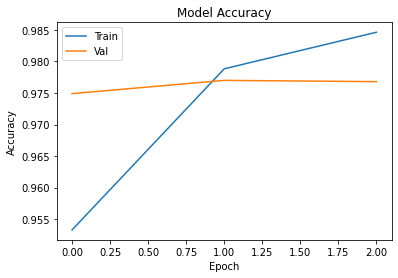

In [19]:
#Visualise the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [20]:
#Show the predictions as probabilities for the first 4 test images
predictions = model.predict(X_test[:4])
predictions

array([[1.1144303e-08, 1.2152992e-12, 4.6449196e-07, 6.5774889e-06,
        3.8600403e-12, 1.3499700e-10, 1.6633855e-14, 9.9999285e-01,
        4.3648964e-09, 9.2896173e-08],
       [6.6344199e-08, 3.5882565e-06, 9.9997187e-01, 1.0149284e-05,
        5.1438648e-11, 4.2197832e-11, 1.3373643e-05, 6.8188070e-14,
        9.3188152e-07, 9.1755149e-14],
       [4.0198127e-08, 9.9970078e-01, 6.7488063e-06, 1.4645938e-09,
        2.4062512e-04, 1.1901053e-06, 1.5851077e-06, 1.2051345e-06,
        4.7904268e-05, 2.1957838e-08],
       [9.9999905e-01, 9.8054614e-14, 1.8088438e-07, 8.5803218e-13,
        8.8446415e-09, 1.3701473e-10, 3.1510353e-07, 6.8599415e-10,
        1.5698491e-09, 5.0848462e-07]], dtype=float32)

In [21]:
# Print predictions as number labels for the first 4 test images
print(np.argmax(predictions, axis=1))
#print the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


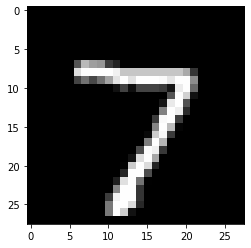

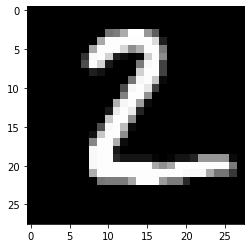

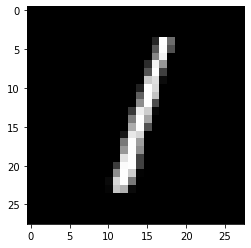

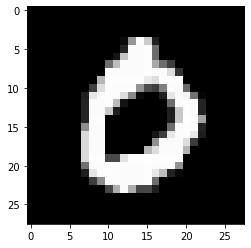

In [22]:
#Show the test images as pictures
for i in range(0,4):
  image=X_test[i]
  image=np.array(image, dtype='float')
  pixels=image.reshape((28,28))
  plt.imshow(pixels, cmap = 'gray')
  plt.show()